# **SpaceApps**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install earthengine-api

In [ ]:
pip install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.5.0
    Uninstalling tenacity-8.5.0:
      Successfully uninstalled tenacity-8.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.9.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which i

In [36]:
pip install contextily


In [ ]:
import ee
ee.Authenticate()
ee.Initialize(project="voltaic-cirrus-474218-c5")

In [ ]:


import earthaccess

# Te pedirá login en una ventanita/console output en Colab
auth = earthaccess.login(strategy="interactive")

# Ejemplo: buscar Sentinel-1 en Palín
results = earthaccess.search_data(
    short_name="SENTINEL-1A_SLC",
 bounding_box=(-90.7594, 14.4433, -90.6594, 14.5433),  #Santa María de Jesús, Sacatepéquez, Guatemala
    temporal=("2025-07-01", "2025-10-4")
)

print("Granules encontrados:", len(results))

Enter your Earthdata Login username: majoooo
Enter your Earthdata password: ··········
Granules encontrados: 14


In [ ]:


import earthaccess

# Te pedirá login en una ventanita/console output en Colab
auth = earthaccess.login(strategy="interactive")

# Ejemplo: buscar Sentinel-1 en Palín
results = earthaccess.search_data(
    short_name="SENTINEL-1A_SLC",
 bounding_box=(-90.7594, 14.4433, -90.6594, 14.5433),  #Santa María de Jesús, Sacatepéquez, Guatemala
    temporal=("2025-09-01", "2025-10-4")
)

print("Granules encontrados:", len(results))

Granules encontrados: 5


In [ ]:
save_dir = "/content/drive/MyDrive/data"

local_files = earthaccess.download(results, save_dir)

print("Downloaded", len(local_files), "granules into:", save_dir)

QUEUEING TASKS | :   0%|          | 0/14 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/14 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/14 [00:00<?, ?it/s]

Downloaded 14 granules into: /content/drive/MyDrive/data


In [ ]:
g = results[0]
print(g.__dict__)

{'cloud_hosted': True, 'uuid': 'e5f90084-1a4e-4733-adb1-ca7eaad19024', 'render_dict': Collection: {'ShortName': 'SENTINEL-1A_SLC', 'Version': '1'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -89.708344, 'Latitude': 14.49763}, {'Longitude': -92.001968, 'Latitude': 14.933491}, {'Longitude': -92.27803, 'Latitude': 13.524467}, {'Longitude': -89.999031, 'Latitude': 13.085161}, {'Longitude': -89.708344, 'Latitude': 14.49763}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-09-03T11:54:44.278Z', 'EndingDateTime': '2025-09-03T11:55:07.635Z'}}
Size(MB): 3360.6461038589478
Data: ['https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20250903T115444_20250903T115507_060823_079297_F3D2.zip']}


In [ ]:
import requests
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# 1. Descargar el catálogo de sismos de USGS
url = ("https://earthquake.usgs.gov/fdsnws/event/1/query?"
       "format=geojson&starttime=2025-04-01&endtime=2025-10-04"
       "&minlatitude=14.3&maxlatitude=14.6&minlongitude=-90.8&maxlongitude=-90.6")

resp = requests.get(url).json()

# 2. Extraer features
features = resp["features"]

# 3. Convertir a GeoDataFrame
geoms = []
mags = []
dates = []

for f in features:
    lon, lat, depth = f["geometry"]["coordinates"]
    mag = f["properties"]["mag"]
    time = pd.to_datetime(f["properties"]["time"], unit="ms")
    geoms.append(Point(lon, lat))
    mags.append(mag)
    dates.append(time)

gdf = gpd.GeoDataFrame({"mag": mags, "time": dates}, geometry=geoms, crs="EPSG:4326")

print("Sismos cargados:", len(gdf))
display(gdf.head())


Sismos cargados: 13


,mag,time,geometry
0,3.5,2025-07-13 04:03:46.618,POINT (-90.6886 14.4978)
1,4.0,2025-07-10 08:29:35.006,POINT (-90.6664 14.5484)
2,3.5,2025-07-10 04:26:44.745,POINT (-90.6657 14.45)
3,3.4,2025-07-09 06:32:47.191,POINT (-90.68 14.4667)
4,3.7,2025-07-09 06:13:17.610,POINT (-90.6549 14.4468)


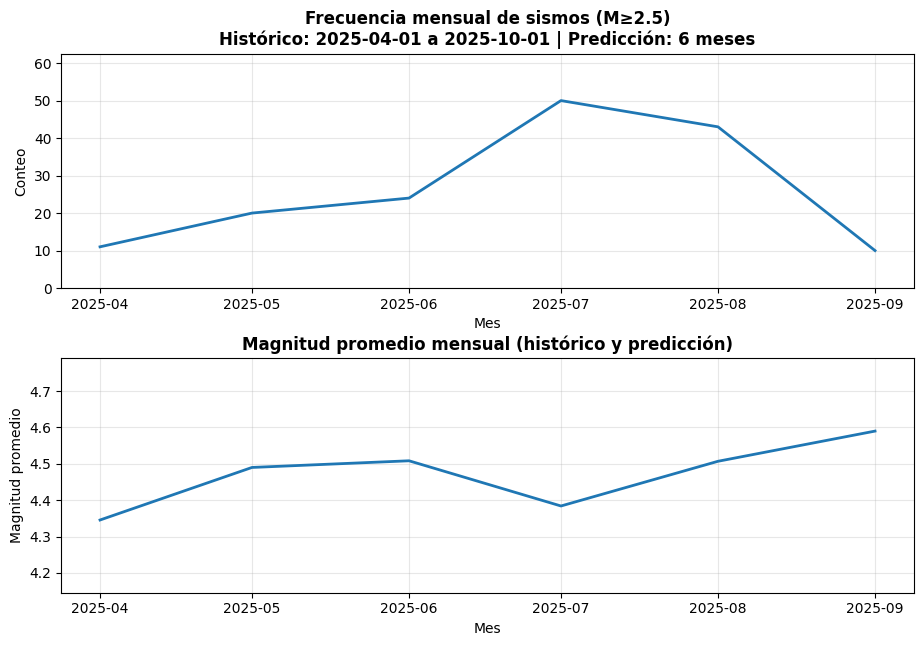

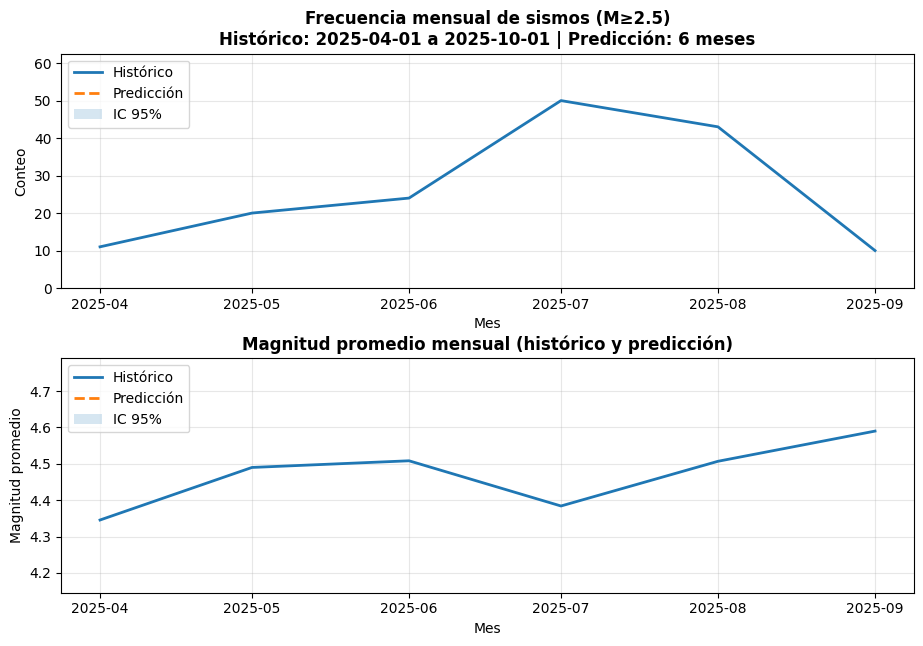

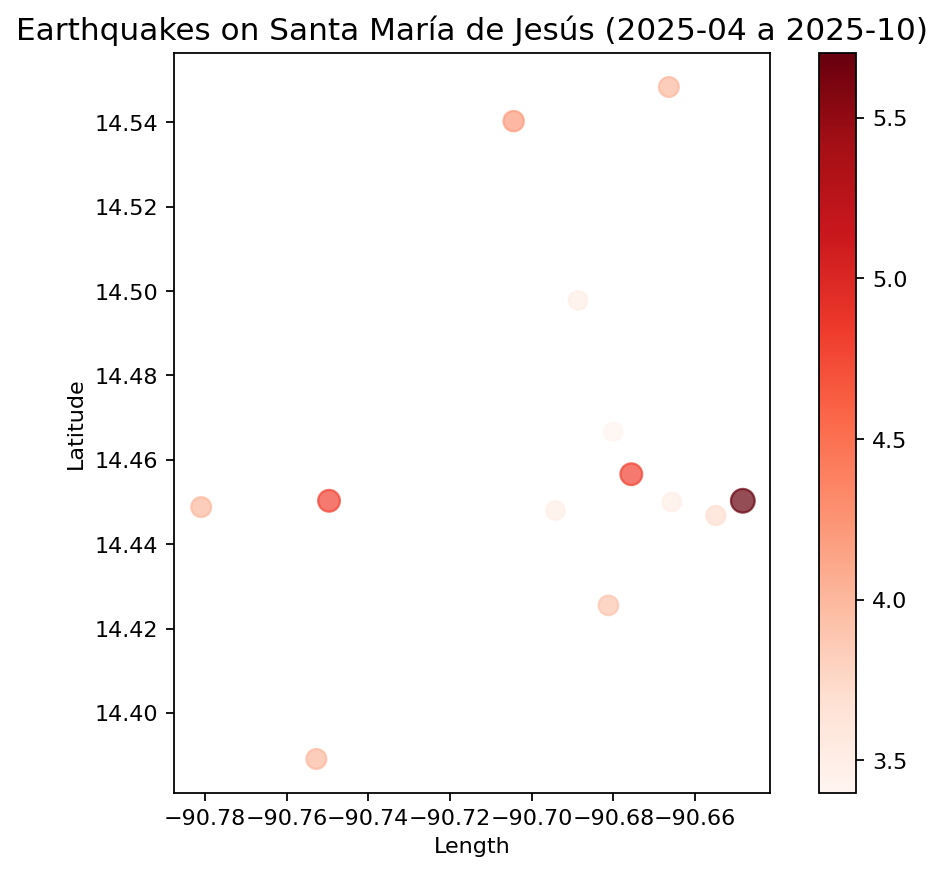

In [44]:
import matplotlib.pyplot as plt

# Graphics for earthquakes over magnitude
fig, ax = plt.subplots(figsize=(8,6))
gdf.plot(ax=ax, column="mag", cmap="Reds", legend=True,
         markersize=gdf["mag"]*20, alpha=0.7)

ax.set_title("Earthquakes on Santa María de Jesús (2025-04 a 2025-10)", fontsize=14)
ax.set_xlabel("Length")
ax.set_ylabel("Latitude")
plt.show()


In [ ]:
!pip install geopandas shapely fiona pyproj


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 274.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 23.2 MB/s eta 0:00:00


In [58]:
import numpy as np
import rasterio
import rasterio.features
import rasterio.transform
import matplotlib.pyplot as plt

In [59]:
import requests
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd

# USGS API query
url = ("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson"
       "&starttime=2025-04-01&endtime=2025-10-04"
       "&minlatitude=14.3&maxlatitude=14.6"
       "&minlongitude=-90.8&maxlongitude=-90.6")

# Get JSON directly
resp = requests.get(url)
data = resp.json()

# Parse features
records = []
for f in data["features"]:
    coords = f["geometry"]["coordinates"]   # [lon, lat, depth]
    props = f["properties"]
    records.append({
        "mag": props.get("mag"),
        "time": props.get("time"),
        "place": props.get("place"),
        "geometry": Point(coords[0], coords[1])
    })

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(records, crs="EPSG:4326")

print("Earthquakes loaded:", len(gdf))
print(gdf.head())


Earthquakes loaded: 13
   mag           time                                       place  \
0  3.5  1752379426618   2 km E of Santa María de Jesús, Guatemala   
1  4.0  1752136175006                                        None   
2  3.5  1752121604745             4 km SW of Amatitlán, Guatemala   
3  3.4  1752042767191  4 km SE of Santa María de Jesús, Guatemala   
4  3.7  1752041597610            4 km SSW of Amatitlán, Guatemala   

                   geometry  
0  POINT (-90.6886 14.4978)  
1  POINT (-90.6664 14.5484)  
2    POINT (-90.6657 14.45)  
3    POINT (-90.68 14.4667)  
4  POINT (-90.6549 14.4468)  


In [15]:
pip install rasterio

Descargando imagen de GEE para visualización...
Error al descargar imagen de GEE: Invalid JSON payload received. Unknown name "dimensions": Cannot find field.
Intentando con un método alternativo o usando un placeholder.


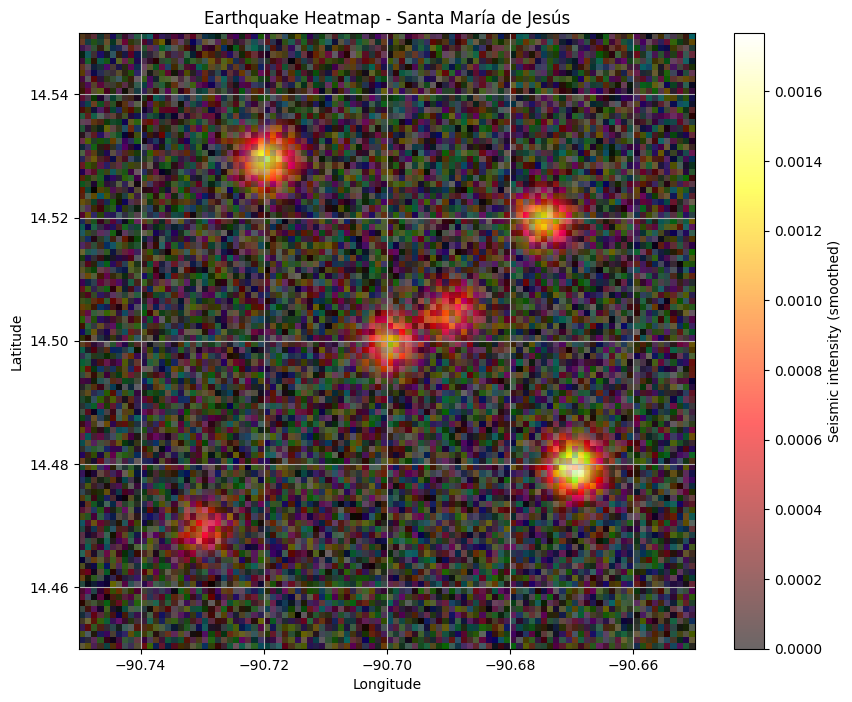

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import ee # Importa la librería de Earth Engine
import geemap # Para interactuar con GEE de forma más sencilla

# --- Parte de tus datos sísmicos (ejemplo) ---
# Asumiendo que ya tienes estos datos:
# mask_mag (tu matriz de magnitudes sísmicas)
# bbox = [min_lon, min_lat, max_lon, max_lat] (límites de tu área de estudio)

grid_size = 100 # Puedes ajustar esto según la resolución de tu heatmap
mask_mag = np.zeros((grid_size, grid_size))
# Simular algunos puntos de sismos
mask_mag[20, 30] = 0.08
mask_mag[70, 80] = 0.10
mask_mag[50, 50] = 0.06
mask_mag[45, 60] = 0.05
mask_mag[80, 20] = 0.04
mask_mag[30, 75] = 0.07

# Define tu bbox para Santa María de Jesús
# ¡Asegúrate de que este bbox coincida con el extent de tu heatmap!
# bbox = [min_lon, min_lat, max_lon, max_lat]
bbox = [-90.75, 14.45, -90.65, 14.55]

# Suavizar con gaussiano para hacerlo tipo heatmap
mask_smooth = gaussian_filter(mask_mag, sigma=3)

# --- Parte de Earth Engine para la imagen de fondo ---

# Inicializar Earth Engine
# try:
#     ee.Initialize()
# except ee.EEException:
#     ee.Authenticate()
#     ee.Initialize()

# Define la región de interés usando tu bbox
roi = ee.Geometry.Rectangle(
    [bbox[0], bbox[1], bbox[2], bbox[3]]
)

# Seleccionar una colección de imágenes (ej. Sentinel-2)
# Filtrar por fecha y región, luego tomar la mediana para reducir nubes
# Aquí puedes ajustar las fechas y la colección si quieres Landsat, etc.
image = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
          .filterBounds(roi) \
          .filterDate('2023-01-01', '2023-12-31') \
          .median() \
          .clip(roi)

# Parámetros de visualización para Sentinel-2 (RGB natural)
# Las bandas B4, B3, B2 corresponden a Rojo, Verde, Azul
vis_params = {
    'min': 0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2']
}

# Obtener la imagen como un array de NumPy para Matplotlib
# geemap tiene una función para esto que simplifica mucho
# Nota: Esto podría tardar un poco dependiendo del tamaño de la imagen y tu conexión
print("Descargando imagen de GEE para visualización...")
try:
    # La función ee_to_numpy_array del geemap puede escalar y proyectar la imagen
    # Se recomienda usar get_image_thumbnail_by_roi para fines de visualización rápida
    # y que Matplotlib pueda manejarla bien.
    map_image_rgb = geemap.ee_to_numpy(image.visualize(**vis_params), region=roi, dimensions=grid_size)
except Exception as e:
    print(f"Error al descargar imagen de GEE: {e}")
    print("Intentando con un método alternativo o usando un placeholder.")
    # Si falla la descarga de GEE, usa un placeholder para que el código no se rompa
    map_image_rgb = np.random.rand(grid_size, grid_size, 3) * 255 # Imagen aleatoria
    map_image_rgb = map_image_rgb.astype(np.uint8)


# --- Visualización con Matplotlib ---

plt.figure(figsize=(10, 8))

# 1. Mostrar la imagen del mapa base
# El 'extent' es crucial para que la imagen se alinee con las coordenadas de tu bbox
# Asegúrate de que las dimensiones de map_image_rgb sean consistentes con grid_size
if map_image_rgb.ndim == 3 and map_image_rgb.shape[2] == 3: # Asegurarse que sea RGB
    plt.imshow(map_image_rgb, extent=(bbox[0], bbox[2], bbox[1], bbox[3]))
else:
    # Si la imagen no es RGB o tiene un formato inesperado, muestra en escala de grises
    print("La imagen descargada no es RGB. Mostrando en escala de grises.")
    plt.imshow(map_image_rgb[:,:,0] if map_image_rgb.ndim == 3 else map_image_rgb,
               cmap='gray', extent=(bbox[0], bbox[2], bbox[1], bbox[3]))


# 2. Mostrar el heatmap de sismos sobre la imagen base
# Usamos 'alpha' para hacer el heatmap transparente
im = plt.imshow(mask_smooth, cmap="hot",
                extent=(bbox[0], bbox[2], bbox[1], bbox[3]),
                interpolation="bilinear",
                alpha=0.6) # Ajusta este valor para más o menos transparencia

plt.colorbar(im, label="Seismic intensity (smoothed)")
plt.title("Earthquake Heatmap - Santa María de Jesús")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True) # Añadir una cuadrícula para referencia de coordenadas
plt.show()

In [12]:
!pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 43.9 MB/s eta 0:00:00


In [17]:
!apt-get install -y gdal-bin python3-gdal

import glob
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

# Ruta base en Drive
base_dir = "/content/drive/MyDrive/data"

# Buscar todos los .tiff en measurement/
tiff_files = glob.glob(base_dir + "/*.SAFE/*/measurement/*.tiff")
print("Total TIFF encontrados:", len(tiff_files))

# Check if tiff_files is empty before proceeding
if not tiff_files:
    print("No TIFF files found in the specified directory structure.")
else:
    # Abrir el primero con GDAL
    ds = gdal.Open(tiff_files[0], gdal.GA_ReadOnly)
    band = ds.GetRasterBand(1).ReadAsArray()

    # Mostrar amplitud en dB
    plt.figure(figsize=(8,6))
    plt.imshow(10*np.log10(np.abs(band)+1), cmap="gray")
    plt.title("Amplitud (dB)")
    plt.colorbar()
    plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.8.4+dfsg-1~jammy0).
python3-gdal is already the newest version (3.8.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Total TIFF encontrados: 0
No TIFF files found in the specified directory structure.


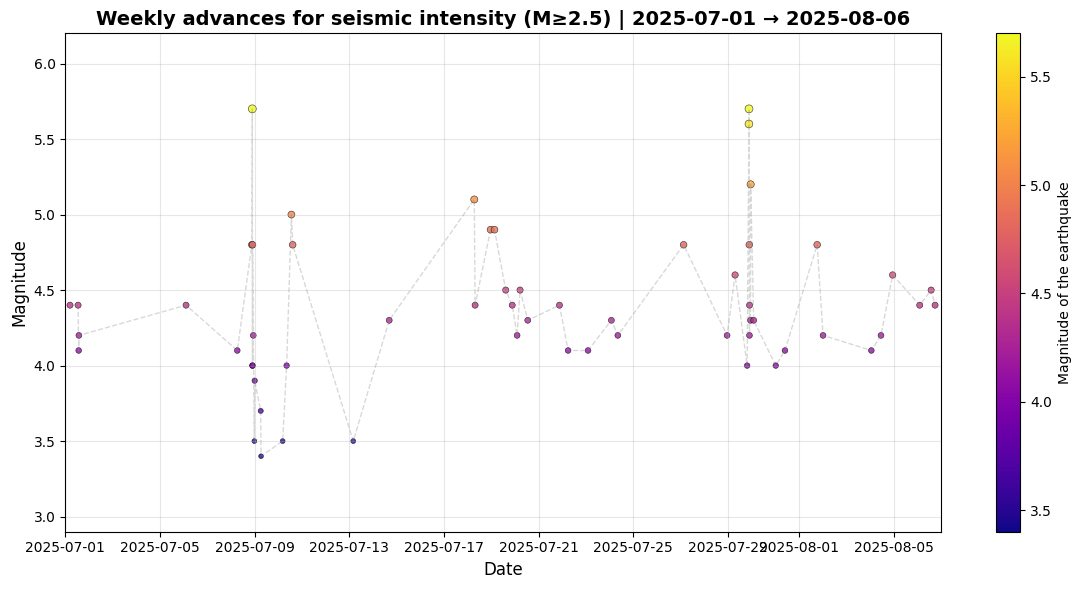

In [24]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation, PillowWriter  # o usar FFMpegWriter
from datetime import datetime

# ====== Parámetros (mismos de arriba) ======
latitude = 14.54
longitude = -90.56
maxradius_km = 500
min_magnitude = 2.5
start_date = pd.Timestamp("2025-07-1")
end_date   = pd.Timestamp("2025-08-07")
# ===========================================

url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query"
    f"?format=geojson&starttime={start_date.date()}&endtime={end_date.date()}"
    f"&minmagnitude={min_magnitude}&latitude={latitude}&longitude={longitude}"
    f"&maxradiuskm={maxradius_km}"
)
resp = requests.get(url)
data = resp.json()

earthquakes = []
for f in data.get("features", []):
    props = f.get("properties", {})
    geo = f.get("geometry", {})
    coords = geo.get("coordinates", [None, None, None])
    earthquakes.append({
        "time": pd.to_datetime(props.get("time"), unit="ms", errors="coerce"),
        "magnitude": props.get("mag"),
        "place": props.get("place"),
        "latitude": coords[1],
        "longitude": coords[0],
        "depth": coords[2],
    })

df = pd.DataFrame(earthquakes).dropna(subset=["time", "magnitude"]).sort_values("time").reset_index(drop=True)
if df.empty:
    raise SystemExit("Criteria not foung.")

weeks = pd.date_range(start=start_date, end=end_date, freq="W-MON")
if weeks[0] != start_date:
    weeks = pd.DatetimeIndex([start_date]).append(weeks)
if weeks[-1] < end_date:
    weeks = weeks.append(pd.DatetimeIndex([end_date]))

fig, ax = plt.subplots(figsize=(12, 6))
norm = mcolors.Normalize(vmin=df["magnitude"].min(), vmax=df["magnitude"].max())
scatter = None
line, = ax.plot([], [], color="gray", alpha=0.3, linestyle="--", linewidth=1)

ax.set_title(
    f"Weekly advances for seismic intensity (M≥{min_magnitude}) near Santa María de Jesús (≤{maxradius_km} km)",
    fontsize=14, weight="bold"
)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Magnitude", fontsize=12)
ax.grid(alpha=0.3)

# colorbar fijo
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Magnitude of the earthquake")

def init():
    ax.set_xlim(start_date, end_date)
    # margen vertical cómodo
    ymin = max(0, df["magnitude"].min() - 0.5)
    ymax = df["magnitude"].max() + 0.5
    ax.set_ylim(ymin, ymax)
    return []

def update(frame):
    global scatter
    # frame i = acumulado hasta semana i
    w_end = weeks[frame]
    df_acc = df[(df["time"] >= start_date) & (df["time"] < w_end)]

    # limpiar scatter previo
    if scatter:
        scatter.remove()

    scatter = ax.scatter(
        df_acc["time"], df_acc["magnitude"],
        c=df_acc["magnitude"], cmap="plasma", norm=norm,
        s=(df_acc["magnitude"]**2), alpha=0.8, edgecolor="k", linewidth=0.4
    )
    line.set_data(df_acc["time"], df_acc["magnitude"])
    ax.set_title(
        f"Weekly advances for seismic intensity (M≥{min_magnitude}) | "
        f"{start_date.date()} → {(w_end - pd.Timedelta(days=1)).date()}",
        fontsize=14, weight="bold"
    )
    return [scatter, line]

ani = FuncAnimation(fig, update, frames=len(weeks), init_func=init, blit=False, interval=1200, repeat=False)
plt.tight_layout()

writer = PillowWriter(fps=1)
ani.save("weekly analysis.gif", writer=writer)

plt.show()


Sismos encontrados: 31
                      time  magnitude                               place  \
30 2025-04-03 05:16:44.609        4.5  72 km SSW of Jiquilillo, Nicaragua   
29 2025-04-06 11:59:06.453        4.9     84 km SSW of Corinto, Nicaragua   
28 2025-04-07 11:40:32.101        4.2     57 km SSW of Corinto, Nicaragua   
27 2025-04-07 17:20:46.378        4.4      85 km SW of Corinto, Nicaragua   
26 2025-04-10 02:04:39.378        4.1  54 km WSW of Puerto Madero, Mexico   

    latitude  longitude   depth  
30   12.1925   -87.8157  24.943  
29   11.8300   -87.5828  40.878  
28   12.0182   -87.4175  40.590  
27   11.8390   -87.6147  25.082  
26   14.4951   -92.8744  35.000  


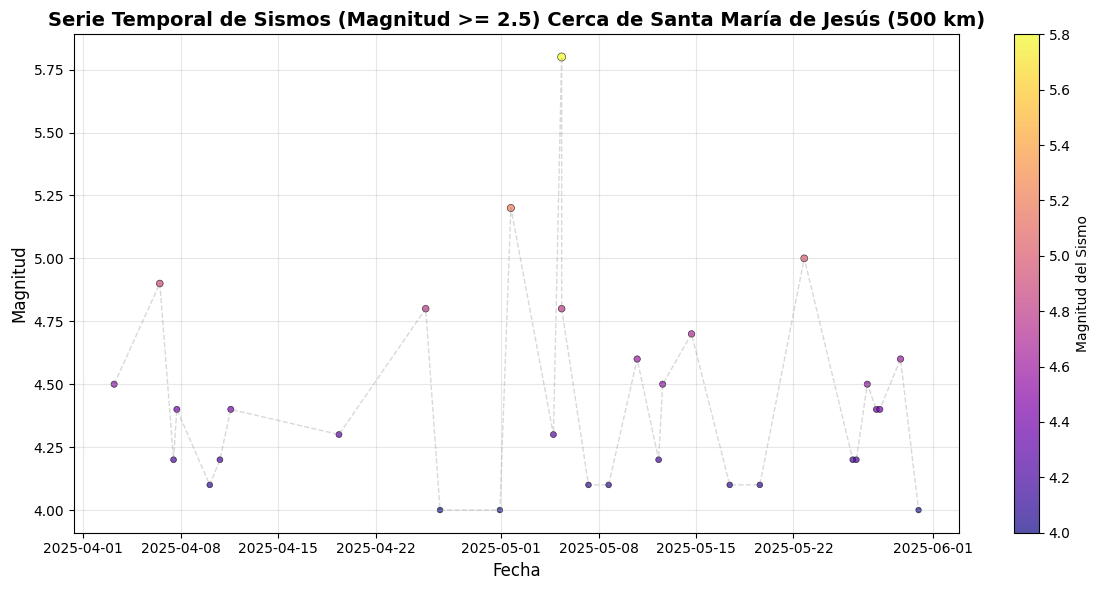

In [4]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


latitude = 14.54
longitude = -90.56
maxradius_km = 500

url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-04-01&endtime=2025-06-01&minmagnitude=2.5&latitude={latitude}&longitude={longitude}&maxradiuskm={maxradius_km}"

response = requests.get(url)
data = response.json()

# 2. Procesar los datos
earthquakes = []
for feature in data['features']:
    props = feature['properties']
    geo = feature['geometry']
    earthquakes.append({
        'time': pd.to_datetime(props['time'], unit='ms'),
        'magnitude': props['mag'],
        'place': props['place'],
        'latitude': geo['coordinates'][1],
        'longitude': geo['coordinates'][0],
        'depth': geo['coordinates'][2]
    })

df_sismos = pd.DataFrame(earthquakes)
df_sismos = df_sismos.sort_values(by='time')

print("Sismos encontrados:", len(df_sismos))
print(df_sismos.head())

# 3. Crear la serie temporal
if not df_sismos.empty:
    plt.figure(figsize=(12, 6))

    # Normalizar los valores de magnitud para el colorbar
    norm = mcolors.Normalize(vmin=df_sismos['magnitude'].min(), vmax=df_sismos['magnitude'].max())

    # Scatter plot para la magnitud
    sc = plt.scatter(df_sismos['time'], df_sismos['magnitude'],
                     c=df_sismos['magnitude'], cmap='plasma', norm=norm,
                     s=df_sismos['magnitude']**2, alpha=0.7, edgecolor='k', linewidth=0.5) # Tamaño del punto por magnitud

    plt.plot(df_sismos['time'], df_sismos['magnitude'], color="gray", alpha=0.3, linestyle='--', linewidth=1)


    plt.title(f"Serie Temporal de Sismos (Magnitud >= 2.5) Cerca de Santa María de Jesús ({maxradius_km} km)", fontsize=14, weight="bold")
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel("Magnitud", fontsize=12)
    plt.grid(alpha=0.3)
    plt.colorbar(sc, label="Magnitud del Sismo")
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron sismos con los criterios especificados.")

In [30]:
# ========== ANIMACIÓN (GIF) ==========
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

plt.ioff()
fig = plt.figure(figsize=(11, 7))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 1], hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])  # Frecuencia
ax2 = fig.add_subplot(gs[1, 0])  # Magnitud

# Títulos y ejes base
ax1.set_title(
    f"Monthly earthquake frequency (M≥{min_magnitude})\nPrevious data: {hist_start.date()} to {hist_end.date()} | 6 month forecast",
    fontsize=12, weight="bold"
)
ax1.set_xlabel("Month")
ax1.set_ylabel("Count")
ax1.grid(alpha=0.3)

ax2.set_title("Monthly Average Magnitude for both previous data and forecasting", fontsize=12, weight="bold")
ax2.set_xlabel("Mes")
ax2.set_ylabel("Average Magnitude")
ax2.grid(alpha=0.3)

# Rangos Y
ax1.set_ylim(0, max(1.0, float(np.nanmax([freq_monthly.max(), freq_pred.max()])) * 1.25))
ymin_mag = float(np.nanmin([mag_monthly.min(), mag_pred.min()])) - 0.2
ymax_mag = float(np.nanmax([mag_monthly.max(), mag_pred.max()])) + 0.2
ax2.set_ylim(ymin_mag, ymax_mag)

# Curvas históricas
(line_hist_freq,) = ax1.plot(hist_x, freq_monthly.values, linewidth=2, label="Previous Months")
(line_hist_mag,)  = ax2.plot(hist_x, mag_monthly.values, linewidth=2, label="Previous Months")

# Placeholders
(line_fc_freq,) = ax1.plot([], [], linewidth=2, linestyle="--", label="Forecast")
(line_fc_mag,)  = ax2.plot([], [], linewidth=2, linestyle="--", label="Forecast")

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")

# Variables globales para las bandas
freq_band_poly = None
mag_band_poly = None

def update(frame):
    global freq_band_poly, mag_band_poly

    if frame == 0:
        # limpiar
        line_fc_freq.set_data([], [])
        line_fc_mag.set_data([], [])
        if freq_band_poly:
            freq_band_poly.remove()
            freq_band_poly = None
        if mag_band_poly:
            mag_band_poly.remove()
            mag_band_poly = None
        ax1.set_title(f"Monthly earthquake frequency from the previous months", fontsize=12, weight="bold")
        ax2.set_title(f"Monthly earthquake Magnitude from the previous months", fontsize=12, weight="bold")
        return [line_fc_freq, line_fc_mag]

    k = frame
    xk = fc_x[:k]
    yk_f = freq_pred.values[:k]
    yk_m = mag_pred.values[:k]
    ci_f = freq_ci.iloc[:k]
    ci_m = mag_ci.iloc[:k]

    # Actualizar líneas
    line_fc_freq.set_data(xk, yk_f)
    line_fc_mag.set_data(xk, yk_m)

    # Remover bandas anteriores
    if freq_band_poly:
        freq_band_poly.remove()
    if mag_band_poly:
        mag_band_poly.remove()

    # Dibujar nuevas bandas
    freq_band_poly = ax1.fill_between(
        xk, ci_f.iloc[:, 0].values, ci_f.iloc[:, 1].values, alpha=0.18
    )
    mag_band_poly = ax2.fill_between(
        xk, ci_m.iloc[:, 0].values, ci_m.iloc[:, 1].values, alpha=0.18
    )

    # Actualizar títulos
    ax1.set_title(f"Frequency per month {k}/{forecast_steps}", fontsize=12, weight="bold")
    ax2.set_title(f"Magnitude per month {k}/{forecast_steps}", fontsize=12, weight="bold")

    return [line_fc_freq, line_fc_mag, freq_band_poly, mag_band_poly]

ani = FuncAnimation(fig, update, frames=forecast_steps + 1, interval=1200, repeat=False)
writer = PillowWriter(fps=1)
ani.save(gif_filename, writer=writer)
plt.close(fig)

print(f"GIF generado: {gif_filename}")
print("Previous Months:", list(hist_x.to_period('M').astype(str)))
print("months forecasted:", list(fc_x.to_period('M').astype(str)))


GIF generado: forecast_sismos_6m.gif
Previous Months: ['2025-04', '2025-05', '2025-06', '2025-07', '2025-08', '2025-09']
months forecasted: ['2025-10', '2025-11', '2025-12', '2026-01', '2026-02', '2026-03']


Sismos encontrados: 74
                      time  magnitude  \
73 2025-06-01 23:16:49.209        4.2   
72 2025-06-02 13:49:43.144        4.3   
71 2025-06-02 23:54:28.427        4.6   
70 2025-06-06 00:07:10.735        4.5   
69 2025-06-08 22:26:02.100        4.3   

                                             place  latitude  longitude  \
73  94 km S of San Francisco del Mar Viejo, Mexico   15.3789   -94.5506   
72               59 km SW of Puerto Madero, Mexico   14.4113   -92.8717   
71           6 km W of Pomposo Castellanos, Mexico   16.5897   -93.9300   
70    6 km NE of Santa María Chiquimula, Guatemala   15.0734   -91.2919   
69                   11 km SW of Talanga, Honduras   14.3213   -87.1552   

      depth  
73   50.134  
72   45.171  
71  132.014  
70  192.348  
69   10.000  


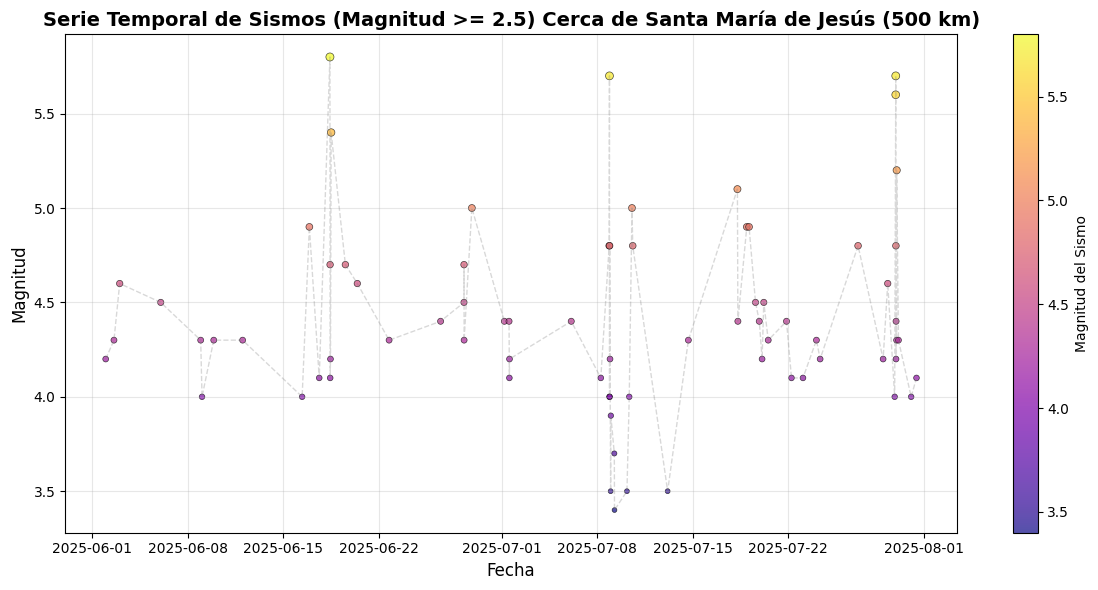

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


latitude = 14.54
longitude = -90.56
maxradius_km = 500

url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-06-01&endtime=2025-08-01&minmagnitude=2.5&latitude={latitude}&longitude={longitude}&maxradiuskm={maxradius_km}"

response = requests.get(url)
data = response.json()

# 2. Procesar los datos
earthquakes = []
for feature in data['features']:
    props = feature['properties']
    geo = feature['geometry']
    earthquakes.append({
        'time': pd.to_datetime(props['time'], unit='ms'),
        'magnitude': props['mag'],
        'place': props['place'],
        'latitude': geo['coordinates'][1],
        'longitude': geo['coordinates'][0],
        'depth': geo['coordinates'][2]
    })

df_sismos = pd.DataFrame(earthquakes)
df_sismos = df_sismos.sort_values(by='time')

print("Sismos encontrados:", len(df_sismos))
print(df_sismos.head())

# 3. Crear la serie temporal
if not df_sismos.empty:
    plt.figure(figsize=(12, 6))

    # Normalizar los valores de magnitud para el colorbar
    norm = mcolors.Normalize(vmin=df_sismos['magnitude'].min(), vmax=df_sismos['magnitude'].max())

    # Scatter plot para la magnitud
    sc = plt.scatter(df_sismos['time'], df_sismos['magnitude'],
                     c=df_sismos['magnitude'], cmap='plasma', norm=norm,
                     s=df_sismos['magnitude']**2, alpha=0.7, edgecolor='k', linewidth=0.5) # Tamaño del punto por magnitud

    plt.plot(df_sismos['time'], df_sismos['magnitude'], color="gray", alpha=0.3, linestyle='--', linewidth=1)


    plt.title(f"Serie Temporal de Sismos (Magnitud >= 2.5) Cerca de Santa María de Jesús ({maxradius_km} km)", fontsize=14, weight="bold")
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel("Magnitud", fontsize=12)
    plt.grid(alpha=0.3)
    plt.colorbar(sc, label="Magnitud del Sismo")
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron sismos con los criterios especificados.")

Sismos encontrados: 53
                      time  magnitude  \
52 2025-08-01 18:32:31.086        4.8   
51 2025-08-02 00:31:39.778        4.2   
50 2025-08-04 01:30:30.270        4.1   
49 2025-08-04 11:16:17.995        4.2   
48 2025-08-04 23:06:49.409        4.6   

                                             place  latitude  longitude  \
52                 20 km SW of Nagarote, Nicaragua   12.1239   -86.6872   
51               89 km SW of Puerto Madero, Mexico   14.1686   -93.0234   
50       60 km S of Puerto El Triunfo, El Salvador   12.7375   -88.5933   
49  87 km S of San Francisco del Mar Viejo, Mexico   15.4482   -94.7268   
48                 60 km WSW of Corinto, Nicaragua   12.2091   -87.6562   

      depth  
52  121.963  
51   10.000  
50   53.012  
49   32.337  
48   35.000  


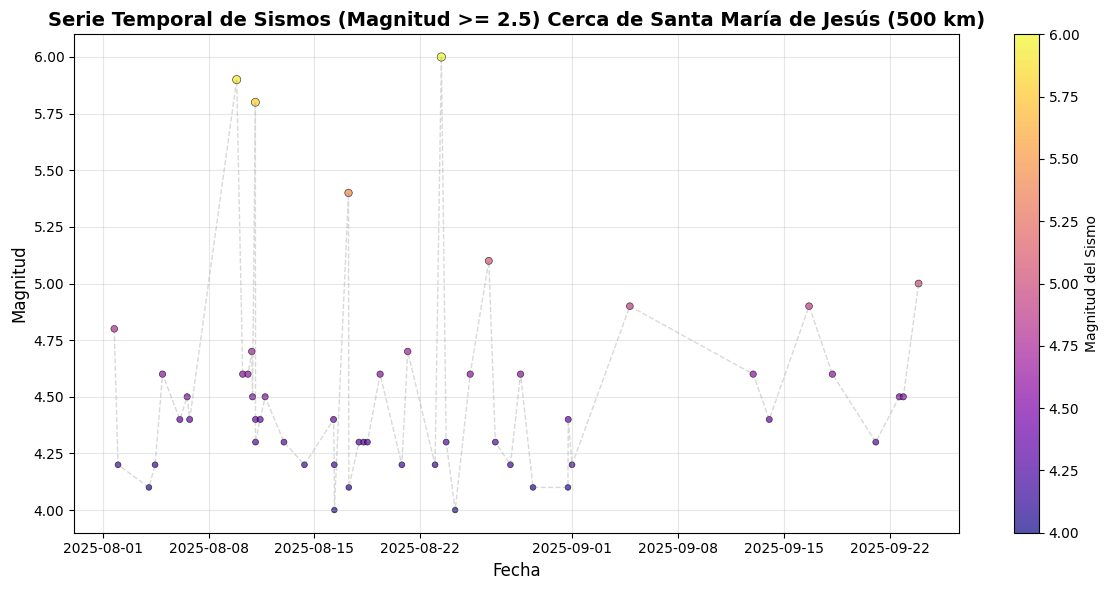

In [6]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


latitude = 14.54
longitude = -90.56
maxradius_km = 500

url = f"https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-08-01&endtime=2025-10-01&minmagnitude=2.5&latitude={latitude}&longitude={longitude}&maxradiuskm={maxradius_km}"

response = requests.get(url)
data = response.json()

# 2. Procesar los datos
earthquakes = []
for feature in data['features']:
    props = feature['properties']
    geo = feature['geometry']
    earthquakes.append({
        'time': pd.to_datetime(props['time'], unit='ms'),
        'magnitude': props['mag'],
        'place': props['place'],
        'latitude': geo['coordinates'][1],
        'longitude': geo['coordinates'][0],
        'depth': geo['coordinates'][2]
    })

df_sismos = pd.DataFrame(earthquakes)
df_sismos = df_sismos.sort_values(by='time')

print("Sismos encontrados:", len(df_sismos))
print(df_sismos.head())

# 3. Crear la serie temporal
if not df_sismos.empty:
    plt.figure(figsize=(12, 6))

    # Normalizar los valores de magnitud para el colorbar
    norm = mcolors.Normalize(vmin=df_sismos['magnitude'].min(), vmax=df_sismos['magnitude'].max())

    # Scatter plot para la magnitud
    sc = plt.scatter(df_sismos['time'], df_sismos['magnitude'],
                     c=df_sismos['magnitude'], cmap='plasma', norm=norm,
                     s=df_sismos['magnitude']**2, alpha=0.7, edgecolor='k', linewidth=0.5) # Tamaño del punto por magnitud

    plt.plot(df_sismos['time'], df_sismos['magnitude'], color="gray", alpha=0.3, linestyle='--', linewidth=1)


    plt.title(f"Serie Temporal de Sismos (Magnitud >= 2.5) Cerca de Santa María de Jesús ({maxradius_km} km)", fontsize=14, weight="bold")
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel("Magnitud", fontsize=12)
    plt.grid(alpha=0.3)
    plt.colorbar(sc, label="Magnitud del Sismo")
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron sismos con los criterios especificados.")